In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.ticker as tick

In [22]:
testing = pd.read_excel("Testing.xlsx", sheet_name="testing")
testing = testing.iloc[:, 0:5]
testing

,Day,Tests,Cum,%daily,%cum
0,2020-02-09,639.0,639.0,0.000012,0.000012
1,2020-02-10,436.0,1075.0,0.000008,0.000021
2,2020-02-11,853.0,1928.0,0.000017,0.000037
3,2020-02-12,1445.0,3373.0,0.000028,0.000066
4,2020-02-13,723.0,4096.0,0.000014,0.000080
5,2020-02-14,1057.0,5153.0,0.000021,0.000100
6,2020-02-15,665.0,5818.0,0.000013,0.000113
7,2020-02-16,400.0,6218.0,0.000008,0.000121
8,2020-02-17,252.0,6470.0,0.000005,0.000126
9,2020-02-18,1094.0,7564.0,0.000021,0.000147


In [3]:
pd.options.display.max_rows=1000


In [23]:
path = "csse_covid_19_data/csse_covid_19_time_series/"
Confirmed = "time_series_19-covid-Confirmed.csv"
Deaths = "time_series_19-covid-Deaths.csv"
Recovered = "time_series_19-covid-Recovered.csv"
files = {"Confirmed": Confirmed,
        "Deaths": Deaths,
        "Recovered": Recovered}

for k,v in files.items():
    df = pd.read_csv(os.path.join(path, v))
    files.update({k: df})

In [24]:
confirmed= files['Confirmed']
deaths = files['Deaths']
recovered = files['Recovered']
confirmed = confirmed[confirmed["Country/Region"].str.contains("Korea")]
deaths = deaths[deaths["Country/Region"].str.contains("Korea")]
recovered = recovered[recovered["Country/Region"].str.contains("Korea")]

In [25]:
sit_report = pd.concat([confirmed, deaths, recovered], keys = files.keys())
sit_report

,,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
Confirmed,158,NaN,"Korea, South",36.0,128.0,1,1,2,2,3,4,...,6088,6593,7041,7314,7478,7513,7755,7869,7979,8086
Deaths,158,NaN,"Korea, South",36.0,128.0,0,0,0,0,0,0,...,35,42,44,50,53,54,60,66,66,72
Recovered,158,NaN,"Korea, South",36.0,128.0,0,0,0,0,0,0,...,41,135,135,118,118,247,288,333,510,510


In [26]:
sit_report = sit_report.reset_index().set_index(["Country/Region", 'level_0']).iloc[:, 4:].T

In [27]:
sit_report.index.name = "Day"
sit_report

Country/Region Korea, South                 
level_0           Confirmed Deaths Recovered
Day                                         
1/22/20                   1      0         0
1/23/20                   1      0         0
1/24/20                   2      0         0
1/25/20                   2      0         0
1/26/20                   3      0         0
1/27/20                   4      0         0
1/28/20                   4      0         0
1/29/20                   4      0         0
1/30/20                   4      0         0
1/31/20                  11      0         0
2/1/20                   12      0         0
2/2/20                   15      0         0
2/3/20                   15      0         0
2/4/20                   16      0         0
2/5/20                   19      0         0
2/6/20                   23      0         0
2/7/20                   24      0         1
2/8/20                   24      0         1
2/9/20                   25      0         3
2/10/20                  27      0         3
2/11/20                  28      0         3
2/12/20                  28      0         7
2/13/20                  28      0         7
2/14/20                  28      0         7
2/15/20                  28      0         9
2/16/20                  29      0         9
2/17/20                  30      0        10
2/18/20                  31      0        12
2/19/20                  31      0        12
2/20/20                 104      1        16
2/21/20                 204      2        16
2/22/20                 433      2        16
2/23/20                 602      6        18
2/24/20                 833      8        18
2/25/20                 977     10        22
2/26/20                1261     12        22
2/27/20                1766     13        22
2/28/20                2337     13        22
2/29/20                3150     16        27
3/1/20                 3736     17        30
3/2/20                 4335     28        30
3/3/20                 5186     28        30
3/4/20                 5621     35        41
3/5/20                 6088     35        41
3/6/20                 6593     42       135
3/7/20                 7041     44       135
3/8/20                 7314     50       118
3/9/20                 7478     53       118
3/10/20                7513     54       247
3/11/20                7755     60       288
3/12/20                7869     66       333
3/13/20                7979     66       510
3/14/20                8086     72       510

In [28]:
sit_report.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20'],
      dtype='object', name='Day')

In [29]:
testing = testing.set_index(testing.Day.dt.date, drop=True).drop("Day", axis=1)

In [30]:
testing.index[0]

datetime.date(2020, 2, 9)

In [31]:
ndx = pd.to_datetime(sit_report.index).date

In [32]:
sit_report = sit_report.set_index(ndx)
sit_report

Country/Region Korea, South                 
level_0           Confirmed Deaths Recovered
2020-01-22                1      0         0
2020-01-23                1      0         0
2020-01-24                2      0         0
2020-01-25                2      0         0
2020-01-26                3      0         0
2020-01-27                4      0         0
2020-01-28                4      0         0
2020-01-29                4      0         0
2020-01-30                4      0         0
2020-01-31               11      0         0
2020-02-01               12      0         0
2020-02-02               15      0         0
2020-02-03               15      0         0
2020-02-04               16      0         0
2020-02-05               19      0         0
2020-02-06               23      0         0
2020-02-07               24      0         1
2020-02-08               24      0         1
2020-02-09               25      0         3
2020-02-10               27      0         3
2020-02-11               28      0         3
2020-02-12               28      0         7
2020-02-13               28      0         7
2020-02-14               28      0         7
2020-02-15               28      0         9
2020-02-16               29      0         9
2020-02-17               30      0        10
2020-02-18               31      0        12
2020-02-19               31      0        12
2020-02-20              104      1        16
2020-02-21              204      2        16
2020-02-22              433      2        16
2020-02-23              602      6        18
2020-02-24              833      8        18
2020-02-25              977     10        22
2020-02-26             1261     12        22
2020-02-27             1766     13        22
2020-02-28             2337     13        22
2020-02-29             3150     16        27
2020-03-01             3736     17        30
2020-03-02             4335     28        30
2020-03-03             5186     28        30
2020-03-04             5621     35        41
2020-03-05             6088     35        41
2020-03-06             6593     42       135
2020-03-07             7041     44       135
2020-03-08             7314     50       118
2020-03-09             7478     53       118
2020-03-10             7513     54       247
2020-03-11             7755     60       288
2020-03-12             7869     66       333
2020-03-13             7979     66       510
2020-03-14             8086     72       510

In [33]:
data = pd.concat([sit_report, testing], axis=1, sort=True)
data

,"(Korea, South, Confirmed)","(Korea, South, Deaths)","(Korea, South, Recovered)",Tests,Cum,%daily,%cum
2020-01-22,1.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-23,1.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-24,2.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-25,2.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-26,3.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-27,4.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-28,4.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-29,4.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-30,4.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-31,11.0,0.0,0.0,NaN,NaN,NaN,NaN


In [34]:
cols = """Confirmed,Deaths,Recovered,Tests,Cum,%daily,%cum""".split(",")
cols

['Confirmed', 'Deaths', 'Recovered', 'Tests', 'Cum', '%daily', '%cum']

In [35]:
data.columns = cols
data

,Confirmed,Deaths,Recovered,Tests,Cum,%daily,%cum
2020-01-22,1.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-23,1.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-24,2.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-25,2.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-26,3.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-27,4.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-28,4.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-29,4.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-30,4.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-31,11.0,0.0,0.0,NaN,NaN,NaN,NaN


In [36]:
graph_cols = ["Tests", "Confirmed", "Deaths", "Recovered"]
color =["b", "y", 'r', 'g']
data[graph_cols]

,Tests,Confirmed,Deaths,Recovered
2020-01-22,NaN,1.0,0.0,0.0
2020-01-23,NaN,1.0,0.0,0.0
2020-01-24,NaN,2.0,0.0,0.0
2020-01-25,NaN,2.0,0.0,0.0
2020-01-26,NaN,3.0,0.0,0.0
2020-01-27,NaN,4.0,0.0,0.0
2020-01-28,NaN,4.0,0.0,0.0
2020-01-29,NaN,4.0,0.0,0.0
2020-01-30,NaN,4.0,0.0,0.0
2020-01-31,NaN,11.0,0.0,0.0


In [37]:
first_test = data.Tests.dropna().index[0]
first_test


datetime.date(2020, 2, 9)

In [38]:
first_test_y = data.Tests.dropna()[0]
xy = (first_test, first_test_y)
dt.timedelta(days=10)
xy_text = (first_test-dt.timedelta(days=10), first_test_y*2)
print(xy, xy_text)

(datetime.date(2020, 2, 9), 639.0) (datetime.date(2020, 1, 30), 1278.0)


In [39]:
sus_1000 = dt.datetime(2020, 2, 18).date()
xy_sustained = (sus_1000, 1000)
xy_sustained_txt = (sus_1000 - dt.timedelta(days=10), 2000)

In [40]:
xy_cases = (dt.datetime(2020, 2, 19), 31)
xy_cases_text = (dt.datetime(2020, 2, 8), 100)

In [41]:
xy_recovered = (dt.datetime(2020, 3,5 ), 41)
xy_recoverd_text = (dt.datetime(2020, 2, 25), 200)

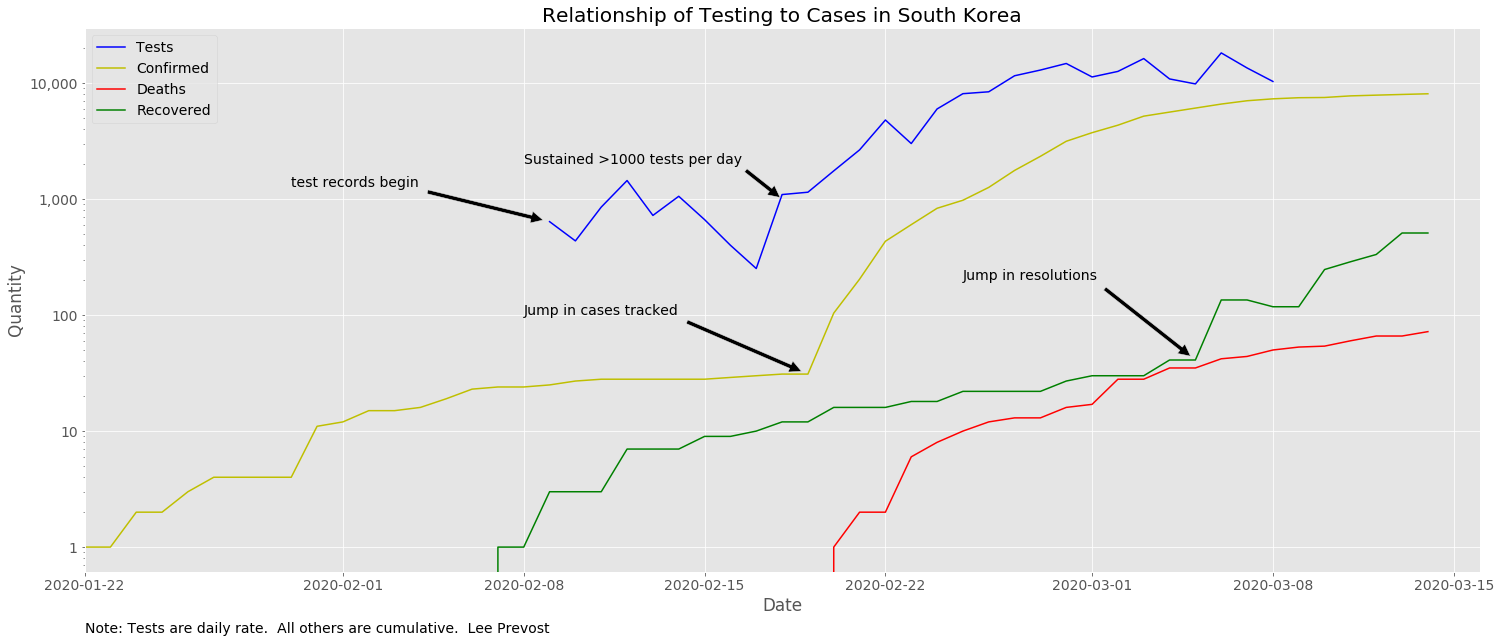

In [42]:
plt.style.use('ggplot')
plt.rcParams.update({"font.size": 14})

f, ax = plt.subplots(figsize=(25,10))
title = "Relationship of Testing to Cases in South Korea"
data[graph_cols].plot( logy=True, ax=ax, title=title, color = color)
arrowprops = dict(facecolor='black', shrink=0.05)
ax.annotate('test records begin', xy=xy, xytext=xy_text,
            arrowprops=arrowprops)  
ax.annotate("Sustained >1000 tests per day", xy=xy_sustained, xytext=xy_sustained_txt,
           arrowprops = arrowprops)
ax.annotate("Jump in cases tracked", xy=xy_cases, xytext = xy_cases_text,
           arrowprops=arrowprops)
ax.annotate("Jump in resolutions", xy=xy_recovered, xytext = xy_recoverd_text,
           arrowprops=arrowprops)
ax.get_yaxis().set_major_formatter(
    tick.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel("Date")
ax.set_ylabel("Quantity")
note = "Note: Tests are daily rate.  All others are cumulative.  Lee Prevost"
plt.annotate(note, (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig("{}.jpg".format(title), bbox_inches='tight')
plt.show()


In [66]:
file = "^KS11.csv"
market = pd.read_csv(file)

In [67]:
market = market.set_index(pd.to_datetime(market.Date).dt.date, drop=True).drop(columns="Date").sort_index()

In [68]:
market

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-18,2179.689941,2183.899902,2172.340088,2179.489990,2179.489990,258000.0
2019-03-19,2183.030029,2183.760010,2171.050049,2177.620117,2177.620117,319700.0
2019-03-20,2171.409912,2177.189941,2152.209961,2177.100098,2177.100098,317600.0
2019-03-21,2183.110107,2200.320068,2173.699951,2184.879883,2184.879883,342700.0
2019-03-22,2192.719971,2195.419922,2178.770020,2186.949951,2186.949951,333600.0
2019-03-25,2158.800049,2159.250000,2143.699951,2144.860107,2144.860107,307100.0
2019-03-26,2152.979980,2153.899902,2143.629883,2148.800049,2148.800049,301300.0
2019-03-27,2147.189941,2152.909912,2132.419922,2145.620117,2145.620117,363200.0
2019-03-28,2131.250000,2136.399902,2120.929932,2128.100098,2128.100098,288000.0


In [86]:
date_filt = pd.datetime(2020, 1, 22).date()

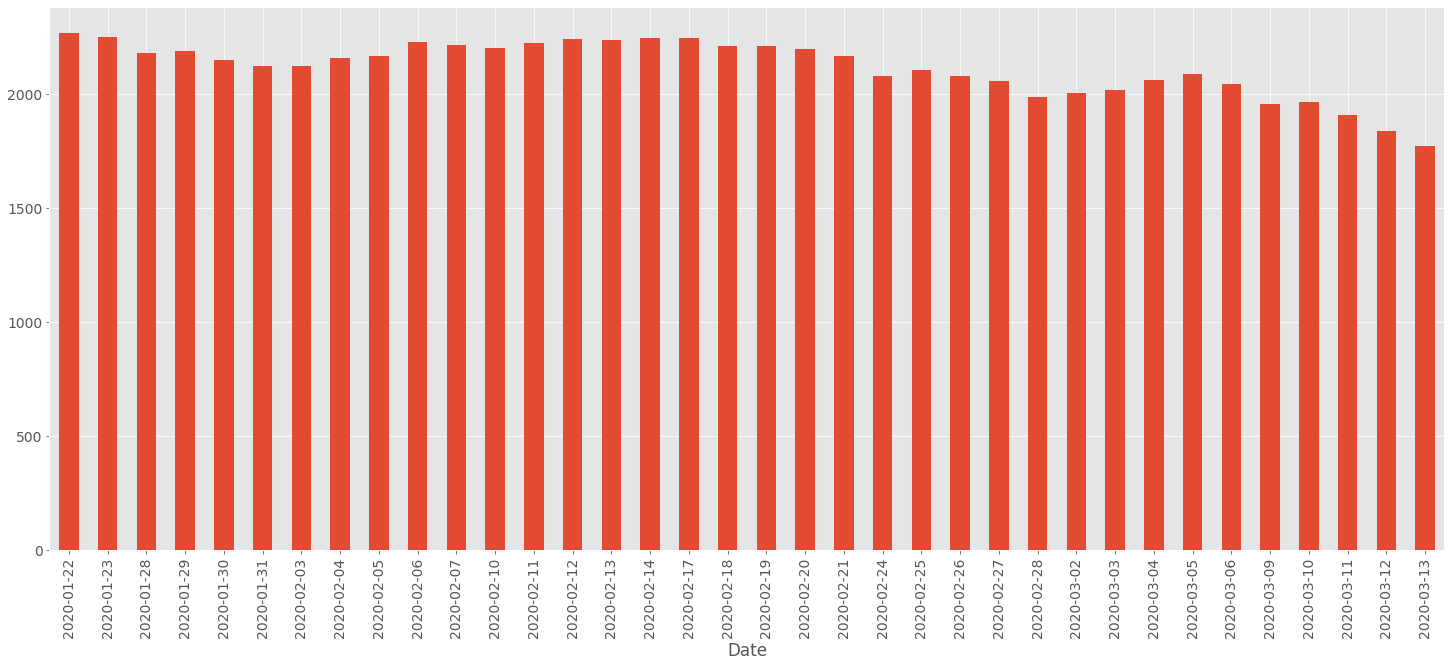

In [90]:
f, ax = plt.subplots(figsize=(25,10))

market[market.index>=date_filt]['Close'].plot(kind='bar', ax=ax)